# Random Forest Classifier (with Upsampling) for Subtask-1

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
import pickle

Load the dataset

In [10]:
df=pd.read_csv("D:\My_Data_Science Project\Social_Media_Offensive_Detection\Social_Media_Offensive_Languge_Detection\Data_Files\Data_File_v1\olid-training-v1.0.tsv",sep="\t")

In [11]:
df

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
...,...,...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,OFF,TIN,IND
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,NaN,NaN
13237,82921,@USER And why report this garbage. We don't g...,OFF,TIN,OTH
13238,27429,@USER Pussy,OFF,UNT,NaN


In [12]:
df['subtask_a'].value_counts()

NOT    8840
OFF    4400
Name: subtask_a, dtype: int64

Converting target into numerical form

In [13]:
from sklearn.utils import resample
df['subtask_a'] = df['subtask_a'].astype('category').cat.codes

In [14]:
df['subtask_a'].value_counts()

0    8840
1    4400
Name: subtask_a, dtype: int64

In [15]:
df.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,1,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,0,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,NaN,NaN


Now balancing the dataset

In [16]:
class_0_count = len(df[df['subtask_a']==0])
class_1_count = len(df[df['subtask_a']==1])

Now performing upsampling for class 1

In [17]:
other_df = df[df['subtask_a']!=1]

In [18]:
other_df['subtask_a'].value_counts()

0    8840
Name: subtask_a, dtype: int64

In [19]:
df_with_1 = df[df['subtask_a']==1]

In [20]:
df_with_1['subtask_a'].value_counts()

1    4400
Name: subtask_a, dtype: int64

In [21]:
df_1_upsampled = resample(df_with_1, replace=True, n_samples=class_0_count, random_state=123)

In [22]:
df_1_upsampled['subtask_a'].value_counts()

1    8840
Name: subtask_a, dtype: int64

Performing concatenate

In [23]:
upsampled_df = pd.concat([df_1_upsampled, other_df])

In [24]:
upsampled_df['subtask_a'].value_counts()

1    8840
0    8840
Name: subtask_a, dtype: int64

Now after balancing performing model creation

In [25]:
count_Vect = CountVectorizer()

In [26]:
X = count_Vect.fit_transform(upsampled_df['tweet'])
Y = upsampled_df['subtask_a']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc_model = RandomForestClassifier(n_estimators=200, max_features='auto', random_state=101,n_jobs=8)

In [32]:
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, n_jobs=8, random_state=101)

In [33]:
y_pred = rfc_model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
acc_score = accuracy_score(Y_test, y_pred)
print('Accuracy score:', acc_score)

Accuracy score: 0.9202488687782805


Saving the model with vectorizer

In [36]:
filename = 'model_for_a.pkl'

with open(filename, 'wb') as fout:
  pickle.dump((count_Vect, rfc_model), fout)


Now loading out the model and testing out the things

In [37]:
with open('model_for_a.pkl', 'rb') as f:
  vect, model = pickle.load(f)

In [38]:
list1 = ['StopKavanaugh he is liar like the rest of the GOP']
string = vect.transform(list1)
sample_prediction = model.predict(string)
sample_prediction

array([1], dtype=int8)

In [39]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[1649   98]
 [ 184 1605]]


In [40]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1747
           1       0.94      0.90      0.92      1789

    accuracy                           0.92      3536
   macro avg       0.92      0.92      0.92      3536
weighted avg       0.92      0.92      0.92      3536



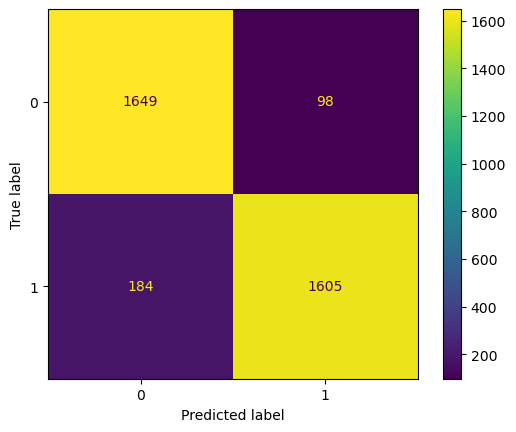

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_plot = ConfusionMatrixDisplay(cm)

cm_plot.plot()

In [42]:
import tweepy
import json


auth = tweepy.OAuth1UserHandler (consumer_key, consumer_secret, access_token, access_token_secret)

api = tweepy.API(auth)

In [49]:
search_results = api.search_tweets('Fraud')
live_tweet_list = []
for tweet in search_results:
    json_str = tweet._json
    if json_str['lang'] == 'en':
      print('Tweet text: ',json_str['text'])
      live_tweet_list.append(json_str['text'])

Tweet text:  RT @semafor: Another associate, Andrew Badolato, was sentenced to three years in prison. 

Steve Bannon was also charged over the scam, but…
Tweet text:  @Keir_Starmer  @ElectoralCommUK Why is this not being investigated?  It is election fraud. #CorruptTories #VoterID 
https://t.co/t1MvtHuF7m
Tweet text:  RT @MuellerSheWrote: NEW: I FOUND SOME VOTER FRAUD! It’s a Republican. He’s been indicted. https://t.co/YOEEZUt2Td
Tweet text:  RT @Tiggersdad2: Does $GNS qualify as a pump and dump since @rogerhamilton forgot to sell any shares? I’m sure the bag holders he created w…
Tweet text:  RT @kylegriffin1: Reuters: STEVE BANNON ASSOCIATE BRIAN KOLFAGE SENTENCED TO MORE THAN FOUR YEARS IN PRISON FOR FRAUD IN PUSH TO BUILD TRUM…
Tweet text:  RT @INCIndia: The Congress will emerge as the unified voice of all Kannadigas against the 40% commission sarkara.

It is our pledge to free…
Tweet text:  RT @Z_Everson: New: Ivanka Trump ditches attorneys in fraud suit, splitting from Don Jr. a

In [50]:
string = vect.transform(live_tweet_list)
sample_prediction = model.predict(string)
sample_prediction

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int8)